# Examen parcial 4  $\color{red}{\text{(10p max)}}$ (Equaciones diferenciales)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.20am del 08.04.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

Mario Jose Felix Rojas
1017261080

In [1]:
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
import numpy as np

## Ejercicio 1. $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Transporte de calor en un objeto puede ser escrito usando segunda orden equacion diferencial:
$$\frac{d^2T}{dx^2}=0.01T-0.2$$
a) Usando `scipy.integrate.solve_bvp` resolver este equacion diferencial cumpliendo siguientes condiciones de limite:

T(x=0)=40  
T(x=10)=200

b) Hace grafico de T(x) vs x (con etiquietas y legend) 

Notese que se puede hacer una reducción de orden con el fin de usar el metodo de Shooting
$$
        U = \frac{dT}{dx} \rightarrow \frac{dU}{dx} = \frac{d^2T}{dx^2} = 0.01T-0.2
$$

In [2]:
# Functions and values
def derivs2(t,y):
    dUdx=np.zeros((y.shape))
    dUdx[0]=y[1]
    dUdx[1]= 0.01*y[1]-0.2
    return dUdx

def bc2(ya,yb):
    residuals=np.array([0.0,0.0])
    residuals[0]=ya[0] - 40.0
    residuals[1]=yb[0] - 200.0
    print(ya[1])
#    print(residuals)
    return residuals

# Dominio temporal
t_steps = 30
t2= np.linspace(0,10,t_steps)
y02 = np.ones((2,t_steps))

In [3]:
# Solution and the required value
sol2 = solve_bvp(derivs2, bc2, t2, y02)

1.0
1.0
1.0
1.0000000298023224
1.0
1.0
16.19666723864814
16.19666723864814


200.0


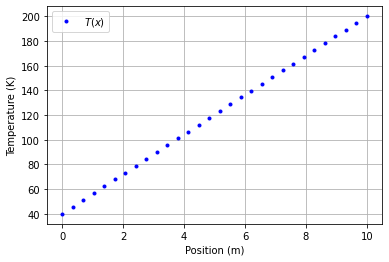

In [4]:
fig, ax=plt.subplots(1,1)
ax.plot(sol2.x, sol2.y[0],'.b',label='$T(x)$')
#ax.plot(3,50,'.b')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Temperature (K)')
ax.legend()
ax.grid()
#print(-5/3)
print(sol2.y[0][-1])

## Ejercicio 2.  $\color{red}{\text{(4p)}}$ Ecuaciones diferenciales - problema de valor inicial (initial value problem).

La ley de Newton del enfriamiento tiene forma de ecuación diferencial

$$\frac{dy}{dt}=k(y-T_{amb}) $$


donde:
* y es la temperatura actual de un objeto
* t es tiempo
* k es un valor constante de enfriamiento
* $T_{amb}$ es la temperatura del ambiente

Digamos que una taza de café tiene una temperatura inicial de 90 centígrados y la temperatura ambiente es de 25 centígrados.

a) usando `scipy.integrate.solve_ivp` resolver ecuación diferencial:

* para el rango t: t=[0:60], [minutos] (use 100 puntos)
* asumir k=-0.06

b) Hace grafico de $y(t)$ vs $t$ (con leyenda)
* si le gusta tomar café cuando está a más de 70 grados, ¿cuál es el tiempo máximo que puede esperar antes de beber el café (puede obtener índices usando `np.argwhere` para obtener un rango de temperatura más preciso)

In [5]:
# parameters
t = np.linspace(0,60,100) # Time
k = -0.06  # Constant
T_amb = 25 # °C
y01 = [90] #°C
t_span1 = [0,60] # Integración

In [13]:
# Function and solution
def derivs(y,t):
    return k*(y-T_amb)
sol1 = solve_ivp(derivs, t_span1, y01 , method='RK45',t_eval = t)
print(sol1.message)

The solver successfully reached the end of the integration interval.


Text(0.5, 0, 'Time (s)')

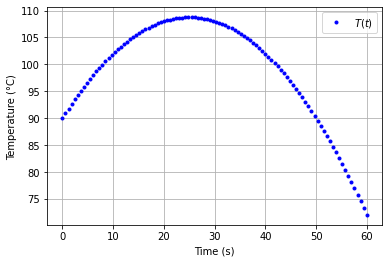

In [14]:
# Grafication
fig, ax = plt.subplots(1,1)
ax.plot(sol1.t,sol1.y[0],'.b',label='$T(t)$')
ax.legend()
ax.grid()
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('Time (s)')

In [15]:
a = np.argwhere(sol1.y[0]>70)
print(len(a))

100


El café no alcanza un temperatura menor a 70°C

## Ejercicio 3.  $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Los organizadores de un espectáculo de fuegos artificiales quieren que los fuegos exploten a 40 metros sobre el suelo 5 segundos después del lanzamiento. Encuentra la velocidad inicial del cohete. 

a) usar ecuacion diferencial segunda orden:

$$\frac{d^2y}{dt^2}= −g $$

donde $y$ es altitud de cohete y,   

b) hacer plot $y(t)$ vs $t$


In [9]:
# Functions and values
def derivs1(t,y):
    dydt=np.zeros((y.shape))
    dydt[0]=y[1]
    dydt[1]=-9.81
    return dydt

def bc1(ya,yb):
    residuals=np.array([0.0,0.0])
    residuals[0]=ya[0] - 0.0
    residuals[1]=yb[0] - 40.0
    print(ya[1])
#    print(residuals)
    return residuals

# Dominio temporal
t_steps = 20
t1= np.linspace(0,5,t_steps)
y0 = np.ones((2,t_steps))

In [10]:
# Solution and the required value
sol = solve_bvp(derivs1, bc1, t1, y0)
print('The required value for velocity is:',sol.y[1][-1],'m/s')

1.0
1.0
1.0
1.0000000298023224
1.0
1.0
32.52499999999999
32.52499999999999
The required value for velocity is: -16.525 m/s


-1.6666666666666667
40.0


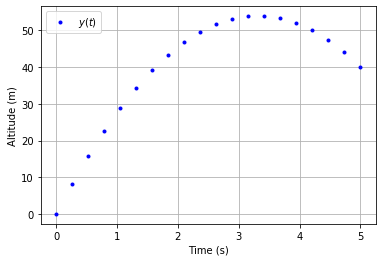

In [11]:
fig, ax=plt.subplots(1,1)
ax.plot(sol.x, sol.y[0],'.b',label='$y(t)$')
#ax.plot(3,50,'.b')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (m)')
ax.legend()
ax.grid()
print(-5/3)
print(sol.y[0][-1])

## Ejercicio 4 Ecuaciones diferenciales acopladas - problema de valor inicial `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$

Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones depredador-presa, son un par de ecuaciones de primer orden, no lineales, ecuaciones diferenciales utilizadas con frecuencia para describir la dinámica de los sistemas biológicos en los que interactúan dos especies, uno como depredador y el otro como presa. Las poblaciones cambian a través del tiempo de acuerdo con el par de ecuaciones:

$$\frac{dx}{dt}=x(\color{red}{\alpha}-\color{red}{\beta} y)$$
$$\frac{dy}{dt}=-y(\color{red}{\gamma}-\color{red}{\delta} x)$$

Esa ecuación describiría la evolución de la población de conejos y zorros (condiciones perfectas)

* x - numbero de conejos  
* y - numbero de zorros

* $\color{red}{\alpha, \beta, \gamma, \delta }$ son parámetros que describen la interacción de las dos especies

* $\frac{dx}{dt}, \frac{dy}{dt}$ representan las tasas de crecimiento de las dos poblaciones a lo largo del tiempo

* $t$ es tiempo

<img src="rabbits_foxes.png" width="400" />

a) solucionar los ecuaciones diferenciales usando `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$
asumir: 
* $\alpha, \beta, \gamma, \delta = 1$
* $x_{ini}=4$
* $y_{ini}=2$
* $t=0:30$ (unidades arbitrarias, asumir meses)

b) hacer plot con dos curvas: $x$ vs. $t$ , $y$ vs. $t$   
c) hacer plot $x vs y$  
d) comentar sobre los dos plots  

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 3.0p):	2.0p
error: dUdx[1]= 0.01*y[1]-0.2

Exercise 2.
Solution + presentation of the results	            (max 4.0p):	2.0p
error: def derivs(y,t):

Exercise 3.
Solution + presentation of the results	            (max 3.0p):	3.0p

Exercise 4 ODEINT.
Solution + presentation of the results	            (max 7.0p):	0.0p

Exercise 4 IVP.
Solution + presentation of the results	            (max 10.0p):  00.0p



- Total:                                              (max 10.0p):   00.0p
```